# Final Project: predicting movies' box office

For this final project, we're giving you a dataset that represents movie information for 3000 movies. The goal is to predict the revenue that a movie will collect, a.k.a. the box office. To do so, you'll have to follow the process we've seen in class:

### 1. Exploratory Data Analysis

__1.1__ Take a look at the variables, which ones are continuous? which ones are categorical? Plot their distributions. Explain what you see. Do you see anything interesting? Anything that you can use later on when processing the data?

__1.2__ What variables are most correlated with revenue? Generate some plots to understand the relationship. Generate a correlation matrix. Explain what you see and what implications it has for the modelling task.

### 2. Data processing
__2.1__ You will have to process some of the columns to extract features for the modelling task. At least, you should be able to extract some useful features from the release date and the original language.

__2.2__ (Optional) Can you extract some features from those more complex columns, such as cast or crew?
Remember to analyse the distribution of the generated features.

__2.3__ Some features have missing values. You'll have to deal with them and explain how you've done it and what could be the limitations of your method.

### 3. Modelling
__3.1__ Build a baseline model that you can compare more complex models against. Generate predictions on a test set and compute the _mean_absolute_error_. Interpret the result.

__3.2__ Build a more complex model. Generate predictions on a test set and compute the _mean_absolute_error_ . Interpret the result and compare it against the previous one. How would you improve the model? Do you see any limitations to your model?

__3.3__ For your final model, analyse the importance of your variables. What do you see?



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("FILMS JAVier.csv")

In [3]:
# check the first two rows
data.head(2)

,title,budget,original_language,original_title,production_companies,release_date,runtime,Keywords,cast,crew,revenue,main_genre,num_genres,num_production_countries,main_production_country
0,Hot Tub Time Machine 2,14000000,en,Hot Tub Time Machine 2,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",2/20/15,93.0,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,Comedy,1.0,1.0,United States of America
1,The Princess Diaries 2: Royal Engagement,40000000,en,The Princess Diaries 2: Royal Engagement,"[{'name': 'Walt Disney Pictures', 'id': 2}]",8/6/04,113.0,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,Comedy,4.0,1.0,United States of America


### 1. Exploratory Data Analysis

- 1.1 Take a look at the variables, which ones are continuous? (budget, revenue etc..) which ones are categorical? (original_language, main_genere etc..)


- Plot their distributions. Explain what you see. Do you see anything interesting? Anything that you can use later on when processing the data?

In [4]:
# check the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2996 entries, 0 to 2995
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   title                     2996 non-null   object 
 1   budget                    2996 non-null   int64  
 2   original_language         2996 non-null   object 
 3   original_title            2996 non-null   object 
 4   production_companies      2843 non-null   object 
 5   release_date              2996 non-null   object 
 6   runtime                   2994 non-null   float64
 7   Keywords                  2721 non-null   object 
 8   cast                      2983 non-null   object 
 9   crew                      2980 non-null   object 
 10  revenue                   2996 non-null   int64  
 11  main_genre                2989 non-null   object 
 12  num_genres                2989 non-null   float64
 13  num_production_countries  2942 non-null   float64
 14  main_pro

In [5]:
# check for missing data and display how many missing values are there for each column
for i in data.columns: 
    print(i, data[i].isna().sum())

title 0
budget 0
original_language 0
original_title 0
production_companies 153
release_date 0
runtime 2
Keywords 275
cast 13
crew 16
revenue 0
main_genre 7
num_genres 7
num_production_countries 54
main_production_country 54


#### Plot the continous variables like revenue and budget

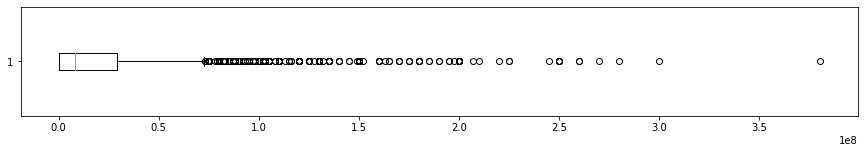

In [6]:
plt.figure(figsize = (15, 2))
plt.boxplot(data['budget'], vert = False)
plt.show()

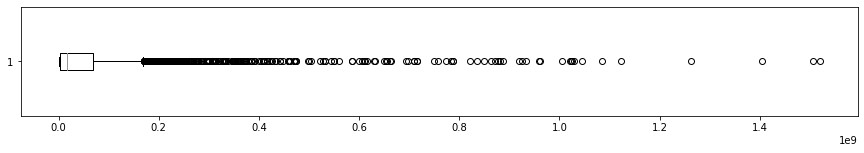

In [7]:
plt.figure(figsize = (15, 2))
plt.boxplot(data['revenue'], vert = False)
plt.show()

#### Plot the categorical variables like original_language, and main_genere

In [8]:
num_genres = data.main_genre.value_counts()
num_genres.values

array([784, 603, 520, 187, 170, 147, 116,  76,  70,  67,  67,  41,  36,
        33,  20,  20,  16,  13,   2,   1], dtype=int64)

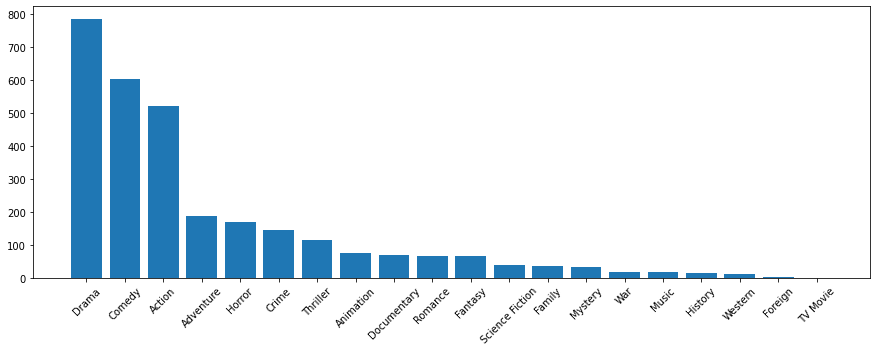

In [9]:
plt.figure(figsize = (15, 5))
plt.bar(num_genres.index, num_genres.values)
plt.xticks(rotation = 45)
plt.show()

In [10]:
num_lang = data['original_language'].value_counts()
num_lang.values

array([2571,   78,   47,   43,   42,   37,   24,   20,   20,   19,   18,
         16,    8,    6,    6,    5,    5,    4,    3,    3,    2,    2,
          2,    2,    2,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1], dtype=int64)

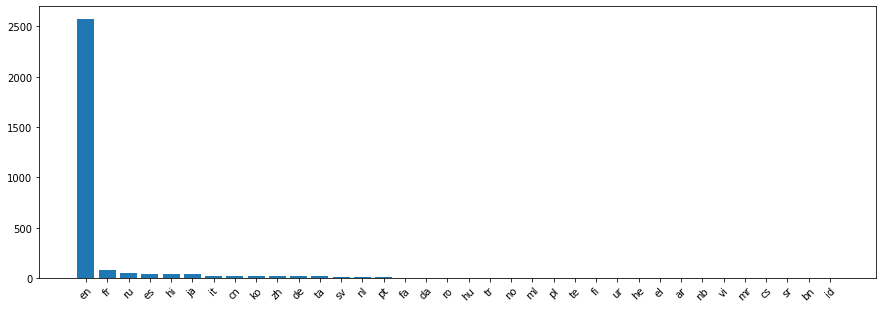

In [11]:
plt.figure(figsize = (15, 5))
plt.bar(num_lang.index, num_lang.values)
plt.xticks(rotation = 45)
plt.show()

- 1.2 What variables are most correlated with revenue? Generate some plots to understand the relationship. Generate a correlation matrix. Explain what you see and what implications it has for the modelling task.

In [12]:
# lets make a correlation pair table
data.corr()

,budget,runtime,revenue,num_genres,num_production_countries
budget,1.000000,0.237665,0.752884,0.232493,0.105950
runtime,0.237665,1.000000,0.215864,0.058269,0.087707
revenue,0.752884,0.215864,1.000000,0.162045,0.038973
num_genres,0.232493,0.058269,0.162045,1.000000,0.013442
num_production_countries,0.105950,0.087707,0.038973,0.013442,1.000000


[]

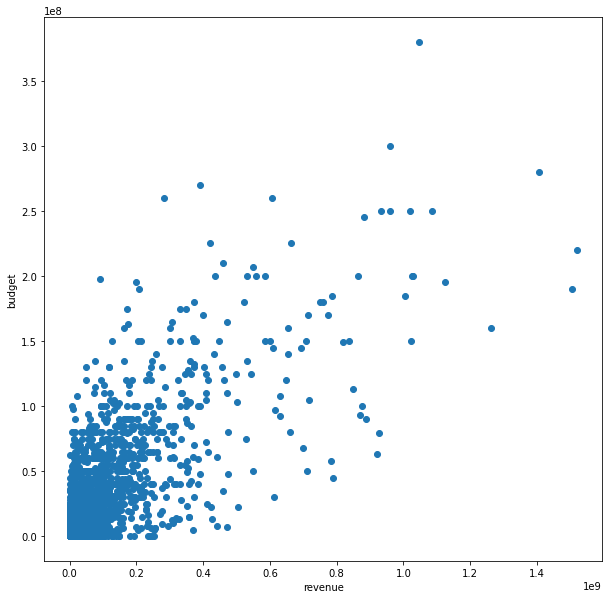

In [13]:
plt.figure(figsize = (10, 10))
plt.scatter(x = data.revenue, y = data.budget)
plt.xlabel('revenue')
plt.ylabel('budget')
plt.plot()

[]

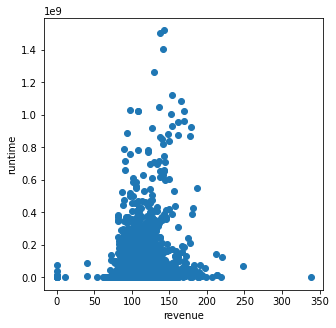

In [14]:
plt.figure(figsize = (5, 5))
plt.scatter( x = data.runtime, y = data.revenue)
plt.xlabel('revenue')
plt.ylabel('runtime')
plt.plot()

### Let's plot a pairplot graphics where we can check the correlation of each variable with all the other variables

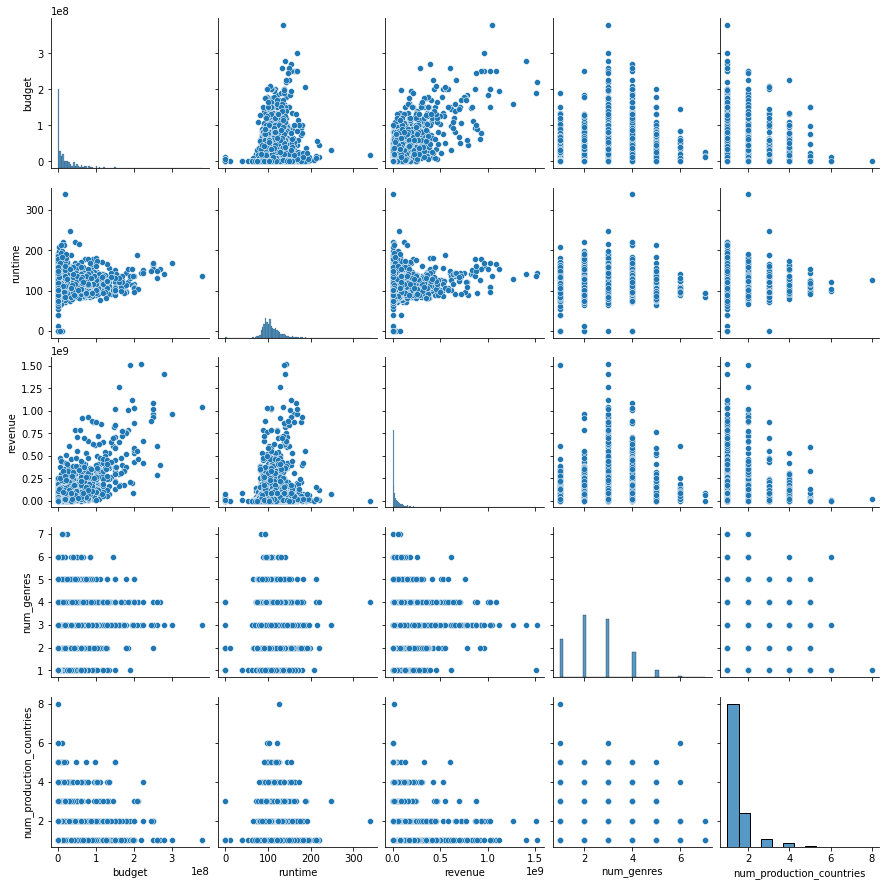

In [15]:
sns.pairplot(data)
plt.show()

### Conclusions: 

- 1 : There is a strong correlation between revenue and budget 
    
- 2 : The correlation between revenue and other variables like runtime is weak.   

- 3 : Given that there is a strong corr. between revenue and budget then the budget is a good predictor for the revenue. (good proxy)

### 2. Data processing
__2.1__ You will have to process some of the columns to extract features for the modelling task. At least, you should be able to extract some useful features from the release date and the original language.

__2.2__ (Optional) Can you extract some features from those more complex columns, such as cast or crew?
Remember to analyse the distribution of the generated features.

__2.3__ Some features have missing values. You'll have to deal with them and explain how you've done it and what could be the limitations of your method.

### Feature Extraction

In [16]:
# the weekdays go from 1-5, while the weekends 6-7
def get_dayofweek(date): 
    data = pd.Timestamp(date)
    dayofweek = date.weekday()
    return dayofweek

# the weekdays go from 1-5, while the weekends 6-7
def get_weekend(date): 
    data = pd.Timestamp(date)
    dayofweek = date.weekday()
    if dayofweek > 5: 
        return 1
    else: 
        return 0

In [17]:
# change the type of the column release_date into datetime64
data['release_date'] = pd.to_datetime(data['release_date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2996 entries, 0 to 2995
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   title                     2996 non-null   object        
 1   budget                    2996 non-null   int64         
 2   original_language         2996 non-null   object        
 3   original_title            2996 non-null   object        
 4   production_companies      2843 non-null   object        
 5   release_date              2996 non-null   datetime64[ns]
 6   runtime                   2994 non-null   float64       
 7   Keywords                  2721 non-null   object        
 8   cast                      2983 non-null   object        
 9   crew                      2980 non-null   object        
 10  revenue                   2996 non-null   int64         
 11  main_genre                2989 non-null   object        
 12  num_genres          

In [18]:
# create a new field based on the day of week 
data['day_of_week'] = data['release_date'].apply(lambda x : get_dayofweek(x))

In [19]:
data['is_weekend'] = data['release_date'].apply(lambda x : get_weekend(x))
data

,title,budget,original_language,original_title,production_companies,release_date,runtime,Keywords,cast,crew,revenue,main_genre,num_genres,num_production_countries,main_production_country,day_of_week,is_weekend
0,Hot Tub Time Machine 2,14000000,en,Hot Tub Time Machine 2,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",2015-02-20,93.0,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,Comedy,1.0,1.0,United States of America,4,0
1,The Princess Diaries 2: Royal Engagement,40000000,en,The Princess Diaries 2: Royal Engagement,"[{'name': 'Walt Disney Pictures', 'id': 2}]",2004-08-06,113.0,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,Comedy,4.0,1.0,United States of America,4,0
2,Whiplash,3300000,en,Whiplash,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...",2014-10-10,105.0,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,Drama,1.0,1.0,United States of America,4,0
3,Kahaani,1200000,hi,Kahaani,NaN,2012-03-09,122.0,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,Thriller,2.0,1.0,India,4,0
4,Marine Boy,0,ko,마린보이,NaN,2009-02-05,118.0,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,Action,2.0,1.0,South Korea,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2991,Chasers,0,en,Chasers,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",1994-04-22,102.0,"[{'id': 378, 'name': 'prison'}, {'id': 572, 'n...","[{'cast_id': 2, 'character': 'Rock Reilly', 'c...","[{'credit_id': '52fe4494c3a368484e02ac7d', 'de...",1596687,Comedy,2.0,1.0,United States of America,4,0
2992,We Are the Best!,0,sv,Vi är bäst!,"[{'name': 'Memfis Film', 'id': 321}, {'name': ...",2013-03-28,102.0,"[{'id': 1192, 'name': 'sweden'}, {'id': 4470, ...","[{'cast_id': 5, 'character': 'Bobo', 'credit_i...","[{'credit_id': '5716b72ac3a3686678012c84', 'de...",180590,Drama,2.0,2.0,Denmark,3,0
2993,The Long Kiss Goodnight,65000000,en,The Long Kiss Goodnight,"[{'name': 'New Line Cinema', 'id': 12}, {'name...",1996-10-11,120.0,"[{'id': 441, 'name': 'assassination'}, {'id': ...","[{'cast_id': 10, 'character': 'Samantha Caine ...","[{'credit_id': '52fe443a9251416c7502d579', 'de...",89456761,Crime,4.0,1.0,United States of America,4,0
2994,Along Came Polly,42000000,en,Along Came Polly,"[{'name': 'Jersey Films', 'id': 216}, {'name':...",2004-01-16,90.0,"[{'id': 966, 'name': 'beach'}, {'id': 2676, 'n...","[{'cast_id': 8, 'character': 'Reuben Feffer', ...","[{'credit_id': '556f817b9251410866000a63', 'de...",171963386,Comedy,2.0,1.0,United States of America,4,0


In [20]:
data['original_language'] = data['original_language'].astype('category')
languages = pd.get_dummies(data['original_language'])
data.head()

,title,budget,original_language,original_title,production_companies,release_date,runtime,Keywords,cast,crew,revenue,main_genre,num_genres,num_production_countries,main_production_country,day_of_week,is_weekend
0,Hot Tub Time Machine 2,14000000,en,Hot Tub Time Machine 2,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",2015-02-20,93.0,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,Comedy,1.0,1.0,United States of America,4,0
1,The Princess Diaries 2: Royal Engagement,40000000,en,The Princess Diaries 2: Royal Engagement,"[{'name': 'Walt Disney Pictures', 'id': 2}]",2004-08-06,113.0,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,Comedy,4.0,1.0,United States of America,4,0
2,Whiplash,3300000,en,Whiplash,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...",2014-10-10,105.0,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,Drama,1.0,1.0,United States of America,4,0
3,Kahaani,1200000,hi,Kahaani,NaN,2012-03-09,122.0,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,Thriller,2.0,1.0,India,4,0
4,Marine Boy,0,ko,마린보이,NaN,2009-02-05,118.0,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,Action,2.0,1.0,South Korea,3,0


In [21]:
data2 =  pd.concat([data, languages], axis=1)

In [22]:
data2

,title,budget,original_language,original_title,production_companies,release_date,runtime,Keywords,cast,crew,...,ro,ru,sr,sv,ta,te,tr,ur,vi,zh
0,Hot Tub Time Machine 2,14000000,en,Hot Tub Time Machine 2,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",2015-02-20,93.0,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",...,0,0,0,0,0,0,0,0,0,0
1,The Princess Diaries 2: Royal Engagement,40000000,en,The Princess Diaries 2: Royal Engagement,"[{'name': 'Walt Disney Pictures', 'id': 2}]",2004-08-06,113.0,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",...,0,0,0,0,0,0,0,0,0,0
2,Whiplash,3300000,en,Whiplash,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...",2014-10-10,105.0,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",...,0,0,0,0,0,0,0,0,0,0
3,Kahaani,1200000,hi,Kahaani,NaN,2012-03-09,122.0,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",...,0,0,0,0,0,0,0,0,0,0
4,Marine Boy,0,ko,마린보이,NaN,2009-02-05,118.0,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2991,Chasers,0,en,Chasers,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",1994-04-22,102.0,"[{'id': 378, 'name': 'prison'}, {'id': 572, 'n...","[{'cast_id': 2, 'character': 'Rock Reilly', 'c...","[{'credit_id': '52fe4494c3a368484e02ac7d', 'de...",...,0,0,0,0,0,0,0,0,0,0
2992,We Are the Best!,0,sv,Vi är bäst!,"[{'name': 'Memfis Film', 'id': 321}, {'name': ...",2013-03-28,102.0,"[{'id': 1192, 'name': 'sweden'}, {'id': 4470, ...","[{'cast_id': 5, 'character': 'Bobo', 'credit_i...","[{'credit_id': '5716b72ac3a3686678012c84', 'de...",...,0,0,0,1,0,0,0,0,0,0
2993,The Long Kiss Goodnight,65000000,en,The Long Kiss Goodnight,"[{'name': 'New Line Cinema', 'id': 12}, {'name...",1996-10-11,120.0,"[{'id': 441, 'name': 'assassination'}, {'id': ...","[{'cast_id': 10, 'character': 'Samantha Caine ...","[{'credit_id': '52fe443a9251416c7502d579', 'de...",...,0,0,0,0,0,0,0,0,0,0
2994,Along Came Polly,42000000,en,Along Came Polly,"[{'name': 'Jersey Films', 'id': 216}, {'name':...",2004-01-16,90.0,"[{'id': 966, 'name': 'beach'}, {'id': 2676, 'n...","[{'cast_id': 8, 'character': 'Reuben Feffer', ...","[{'credit_id': '556f817b9251410866000a63', 'de...",...,0,0,0,0,0,0,0,0,0,0


In [23]:
# check for missing data and display how many missing values are there for each column
for i in data2.columns: 
    print(i, data2[i].isna().sum())

title 0
budget 0
original_language 0
original_title 0
production_companies 153
release_date 0
runtime 2
Keywords 275
cast 13
crew 16
revenue 0
main_genre 7
num_genres 7
num_production_countries 54
main_production_country 54
day_of_week 0
is_weekend 0
ar 0
bn 0
cn 0
cs 0
da 0
de 0
el 0
en 0
es 0
fa 0
fi 0
fr 0
he 0
hi 0
hu 0
id 0
it 0
ja 0
ko 0
ml 0
mr 0
nb 0
nl 0
no 0
pl 0
pt 0
ro 0
ru 0
sr 0
sv 0
ta 0
te 0
tr 0
ur 0
vi 0
zh 0


In [24]:
# missing  values imputation for runtime which has only two missing values as I already show above. 
# given that there are only two missing values in runtime the imputation process shouldnt distort the data significantly
# moreover, for the imputation I'm using the median which is robust to outliers 
data2['runtime']= data2['runtime'].fillna(data2['runtime'].median())

In [25]:
# check again for missing data - now the column runtime doesn't have any other missing datata
for i in data2.columns: 
    print(i, data2[i].isna().sum())

title 0
budget 0
original_language 0
original_title 0
production_companies 153
release_date 0
runtime 0
Keywords 275
cast 13
crew 16
revenue 0
main_genre 7
num_genres 7
num_production_countries 54
main_production_country 54
day_of_week 0
is_weekend 0
ar 0
bn 0
cn 0
cs 0
da 0
de 0
el 0
en 0
es 0
fa 0
fi 0
fr 0
he 0
hi 0
hu 0
id 0
it 0
ja 0
ko 0
ml 0
mr 0
nb 0
nl 0
no 0
pl 0
pt 0
ro 0
ru 0
sr 0
sv 0
ta 0
te 0
tr 0
ur 0
vi 0
zh 0


In [26]:
# I decide to throw away the rest of the nans as they cannot be replaced in a reliable way without introducing distortion 
# in the data.
# By dropping all the rows that contain nans the dataset will be impacted by 10 %
data2 = data2.dropna()

In [27]:
# check again for missing data
for i in data2.columns: 
    print(i, data2[i].isna().sum())

title 0
budget 0
original_language 0
original_title 0
production_companies 0
release_date 0
runtime 0
Keywords 0
cast 0
crew 0
revenue 0
main_genre 0
num_genres 0
num_production_countries 0
main_production_country 0
day_of_week 0
is_weekend 0
ar 0
bn 0
cn 0
cs 0
da 0
de 0
el 0
en 0
es 0
fa 0
fi 0
fr 0
he 0
hi 0
hu 0
id 0
it 0
ja 0
ko 0
ml 0
mr 0
nb 0
nl 0
no 0
pl 0
pt 0
ro 0
ru 0
sr 0
sv 0
ta 0
te 0
tr 0
ur 0
vi 0
zh 0


In [28]:
data2.shape

(2613, 53)

### 3. Modelling
__3.1__ Build a baseline model that you can compare more complex models against. Generate predictions on a test set and compute the _mean_absolute_error_. Interpret the result.

__3.2__ Build a more complex model. Generate predictions on a test set and compute the _mean_absolute_error_ . Interpret the result and compare it against the previous one. How would you improve the model? Do you see any limitations to your model?

__3.3__ For your final model, analyse the importance of your variables. What do you see?


### The baseline model

In [29]:
clean_data = data2.select_dtypes(np.number)

In [30]:
clean_data

,budget,runtime,revenue,num_genres,num_production_countries,day_of_week,is_weekend,ar,bn,cn,...,ro,ru,sr,sv,ta,te,tr,ur,vi,zh
0,14000000,93.0,12314651,1.0,1.0,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,40000000,113.0,95149435,4.0,1.0,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3300000,105.0,13092000,1.0,1.0,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,100.0,34327391,5.0,1.0,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,6000000,91.0,18750246,2.0,1.0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2991,0,102.0,1596687,2.0,1.0,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2992,0,102.0,180590,2.0,2.0,3,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2993,65000000,120.0,89456761,4.0,1.0,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2994,42000000,90.0,171963386,2.0,1.0,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### prepare the data for the model

In [31]:
# create the main variables X and y where X is the independent variable and y is the dependent variable 
y = clean_data['revenue'].values
X = clean_data.drop(['revenue'], axis = 1)

In [32]:
X = X[['budget', 'runtime', 'num_genres', 'num_production_countries', 'day_of_week', 'is_weekend', 'en']]

In [33]:
X = X.values

#### The model

- the model that I will be using to predict the revenue is a linear regression model.

- it will learn the relationship between X and y and will use it to make predictions. 

In [34]:
# declare the variable model
linear_model = LinearRegression()

In [35]:

#X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

In [36]:
X.shape

(2613, 7)

In [37]:
# Split the data into traingset and testset with a 80 -20 partition respectively. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

In [38]:
# train the model
linear_model.fit(X_train, y_train)

LinearRegression()

In [45]:
linear_model.intercept_

array([25563511.81588892])

In [46]:
linear_model.coef_

array([[ 2.63512453e+00,  1.61262954e+05, -2.14920258e+06,
        -7.65533198e+06, -7.19387025e+06,  1.93911486e+07,
         2.12875828e+06]])

In [39]:
# obtain the score (r-squared)
linear_model.score(X_train, y_train)

0.53522519407832

In [40]:
# make predictions 
predicted = linear_model.predict(X_test)

In [41]:
# computing the mean absolute error
mean_absolute_error = np.mean(abs(predicted - y_test))

In [42]:
mean_absolute_error

53159234.1603959

In [43]:
#tried to use keywords.  Could mot get better results. Looked at your notebook and could not understand
#how logical regression fits in this situation.  Researched and still only saw that logical regression
# was used for categorical.
for i in data2['Keywords']:
    
    arr_i = i.split('\'}, {\'')
    for j in arr_i: 
        #print(j)
        arr_j = j.split('name')
        for k in arr_j: 
            print(k)
    

[{'id': 4379, '
': 'time travel
id': 9663, '
': 'sequel
id': 11830, '
': 'hot tub
id': 179431, '
': 'duringcreditsstinger'}]
[{'id': 2505, '
': 'coronation
id': 4263, '
': 'duty
id': 6038, '
': 'marriage
id': 13072, '
': 'falling in love'}]
[{'id': 1416, '
': 'jazz
id': 1523, '
': 'obsession
id': 1640, '
': 'conservatory
id': 2176, '
': 'music teacher
id': 14512, '
': 'new york city
id': 14819, '
': 'violence
id': 33896, '
': 'montage
id': 156823, '
': 'drummer
id': 170418, '
': 'public humiliation
id': 176095, '
': 'jazz band
id': 206298, '
': 'young adult
id': 207739, '
': 'music school'}]
[{'id': 2041, '
': 'island
id': 4418, '
': 'pirate gang
id': 6300, '
': 'puppet
id': 6956, '
': 'treasure hunt'}]
[{'id': 11800, '
': 'mockumentary
id': 33534, '
': 'folk singer'}]
[{'id': 240, '
': 'underdog
id': 276, '
': 'philadelphia
id': 396, '
': 'transporter
id': 700, '
': 'italo-american
id': 1721, '
': 'fight
id': 2038, '
': "love of one's life"}, {'id': 2416, '
': 'publicity
id': 2792, '


': 'based on graphic novel
id': 178517, '
': 'middle aged man'}]
[{'id': 10988, '
': 'based on tv series
id': 34079, '
': 'death
id': 162410, '
': 'exploding planet
id': 162415, '
': 'mountain cabin
id': 162429, '
': 'solar system'}]
[{'id': 9253, '
': 'slapstick
id': 159753, '
': 'ensemble cast
id': 159953, '
': 'automobile racing
id': 196401, '
': 'cross country race
id': 205850, '
': 'turn of the century'}]
[{'id': 9963, '
': 'kids and family
id': 10168, '
': 'aviation
id': 11085, '
': 'castaway
id': 11823, '
': 'pacific island
id': 161155, '
': 'kids'}]
[{'id': 10681, '
': 'from backpacks to strollers'}]
[{'id': 186, '
': 'christianity
id': 2974, '
': 'jesus christ
id': 3033, '
': 'apostle
id': 3571, '
': 'crucifixion
id': 3575, '
': 'jerusalem
id': 5049, '
': 'ancient rome
id': 6150, '
': 'faith
id': 6506, '
': 'resurrection
id': 10877, '
': 'dead body
id': 11704, '
': 'judaism
id': 14989, '
': 'religious
id': 156081, '
': 'tomb'}]
[{'id': 3616, '
': 'college
id': 4543, '
': 'than

': 'australia
id': 10148, '
': 'tribe
id': 33688, '
': 'hunting
id': 34079, '
': 'death
id': 47020, '
': 'storytelling
id': 47972, '
': 'native peoples
id': 158279, '
': 'hunt
id': 193459, '
': 'australian aborigine'}]
[{'id': 6732, '
': 'mascot
id': 171691, '
': 'beer keg
id': 171692, '
': 'political correctness
id': 171695, '
': 'ultimate frisbee
id': 171698, '
': 'funky music
id': 171703, '
': 'fund raiser
id': 171704, '
': 'stage diving'}]
[{'id': 1014, '
': 'loss of lover
id': 1262, '
': 'mountain
id': 1442, '
': 'winter
id': 1994, '
': 'wolf
id': 4433, '
': 'conversation
id': 4959, '
': 'death of a friend
id': 5160, '
': 'aggression by animal
id': 5198, '
': 'cold
id': 8087, '
': 'horror
id': 8637, '
': 'fall from height
id': 9937, '
': 'suspense
id': 10794, '
': 'snow
id': 12392, '
': 'best friend
id': 158130, '
': 'animal attack
id': 181031, '
': 'ski lift
id': 198433, '
': 'frostbite'}]
[{'id': 1852, '
': 'mutant
id': 8828, '
': 'marvel comic
id': 9715, '
': 'superhero
id': 97

': 'trashed house
id': 174954, '
': 'aerial shot
id': 174959, '
': 'military dress uniform
id': 174960, '
': 'vanity
id': 174968, '
': 'flare
id': 187056, '
': 'woman director'}]
[{'id': 168297, '
': 'tyrant
id': 168302, '
': 'ironclad ship'}]
[{'id': 2143, '
': 'loss of parents
id': 5276, '
': 'wild boar
id': 6464, '
': 'uncle
id': 11326, '
': 'shaman
id': 11436, '
': 'redemption
id': 13084, '
': 'king
id': 14767, '
': 'scar
id': 18136, '
': 'hyena
id': 18153, '
': 'meerkat'}]
[{'id': 1826, '
': 'space marine
id': 4565, '
': 'dystopia
id': 10158, '
': 'alien planet
id': 163561, '
': 'genetic engineering'}]
[{'id': 570, '
': 'rape
id': 1228, '
': '1970s
id': 2620, '
': 'evidence
id': 3352, '
': 'tree
id': 6155, '
': 'afterlife
id': 6381, '
': 'loss of daughter
id': 10714, '
': 'serial killer
id': 13092, '
': 'corpse
id': 14576, '
': 'pedophile
id': 18425, '
': 'teenage love
id': 172291, '
': 'grieving
id': 184988, '
': 'childhood sexual abuse
id': 223438, '
': 'based on young adult nov

': 'scuba
id': 185477, '
': 'trapped underwater\xa0'}]
[{'id': 1328, '
': 'secret
id': 1936, '
': 'blackmail
id': 5420, '
': 'fisherman
id': 6149, '
': 'police
id': 6270, '
': 'high school
id': 9665, '
': 'cover-up
id': 9713, '
': 'friends
id': 9748, '
': 'revenge
id': 9826, '
': 'murder
id': 10225, '
': 'pageant
id': 12339, '
': 'slasher
id': 13130, '
': 'teenager
id': 15127, '
': 'killer'}]
[{'id': 572, '
': 'sex
id': 3182, '
': 'seduction
id': 5451, '
': 'comic book
id': 9820, '
': 'alternate dimension
id': 161919, '
': 'adult animation
id': 202399, '
': 'cartoonist
id': 209220, '
': 'live action and animation'}]
[{'id': 1927, '
': 'car breakdown
id': 3593, '
': 'wilderness
id': 5091, '
': 'kiss
id': 5305, '
': 'gambling debts
id': 6996, '
': 'car garage'}]
[{'id': 931, '
': 'jealousy
id': 1743, '
': 'journey in the past
id': 2842, '
': 'sigmund freud
id': 4379, '
': 'time travel
id': 5540, '
': 'heavy metal
id': 5671, '
': 'socrates
id': 5672, '
': 'billy the kid
id': 5674, '
': 's

': 'flying
id': 2343, '
': 'magic
id': 3205, '
': 'fairy tale
id': 4332, '
': 'peter pan
id': 5938, '
': 'mermaid
id': 12988, '
': 'pirate
id': 170362, '
': 'fantasy world'}]
[{'id': 1228, '
': '1970s
id': 1556, '
': 'texas
id': 6270, '
': 'high school
id': 10267, '
': 'comedy
id': 10683, '
': 'coming of age
id': 13088, '
': 'summer
id': 13130, '
': 'teenager
id': 15060, '
': 'period drama
id': 234367, '
': 'great soundtrack'}]
[{'id': 271, '
': 'competition
id': 2041, '
': 'island
id': 2135, '
': 'radio
id': 3345, '
': 'bahamas
id': 3616, '
': 'college
id': 4728, '
': 'knife
id': 5420, '
': 'fisherman
id': 6876, '
': 'vacation
id': 9748, '
': 'revenge
id': 9826, '
': 'murder
id': 10776, '
': 'marijuana
id': 10793, '
': 'resort
id': 11221, '
': 'blood
id': 12339, '
': 'slasher
id': 14527, '
': 'storm
id': 14692, '
': 'hook
id': 15127, '
': 'killer'}]
[{'id': 603, '
': 'elves
id': 606, '
': 'orcs
id': 609, '
': 'middle-earth (tolkien)
id': 611, '
': 'hobbit
id': 818, '
': 'based on nove

': '1970s
id': 14751, '
': 'youth
id': 18035, '
': 'family
id': 187056, '
': 'woman director'}]
[{'id': 637, '
': 'pop
id': 1416, '
': 'jazz
id': 3462, '
': 'tzar
id': 6027, '
': 'music
id': 6220, '
': 'mafia boss
id': 6382, '
': 'folk music
id': 10572, '
': 'music business
id': 33475, '
': 'songwriter
id': 158744, '
': 'stock footage
id': 161919, '
': 'adult animation
id': 173687, '
': 'music hall
id': 176095, '
': 'jazz band
id': 176096, '
': 'generational
id': 176098, '
': 'jewish mafia
id': 176104, '
': 'heroin addiction'}]
[{'id': 1562, '
': 'hostage
id': 1930, '
': 'kidnapping
id': 15483, '
': 'car chase'}]
[{'id': 65, '
': 'holiday
id': 9799, '
': 'romantic comedy
id': 10041, '
': 'dysfunctional family
id': 207317, '
': 'christmas'}]
[{'id': 90, '
': 'paris
id': 5091, '
': 'kiss
id': 18254, '
': 'laptop
id': 187056, '
': 'woman director
id': 229136, '
': 'breastfeeding
id': 229181, '
': 'paris metro
id': 229182, '
': 'computer worm'}]
[{'id': 494, '
': 'father son relationship
i

id': 6956, '
': 'treasure hunt
id': 9830, '
': 'nuclear explosion
id': 18524, '
': 'refrigerator
id': 41586, '
': 'archaeologist
id': 176731, '
': 'indiana jones
id': 184134, '
': 'archeology\xa0'}]
[{'id': 549, '
': 'prostitute
id': 797, '
': 'showdown
id': 11117, '
': 'tank
id': 11719, '
': 'dirty cop
id': 162365, '
': 'military'}]
[{'id': 818, '
': 'based on novel
id': 1333, '
': 'desperation
id': 1621, '
': 'robber
id': 3607, '
': 'hold-up robbery
id': 9714, '
': 'remake
id': 10532, '
': 'suburbia
id': 14549, '
': 'loss of job
id': 33740, '
': 'humiliation
id': 156052, '
': 'unemployment
id': 157296, '
': 'bankruptcy
id': 160510, '
': 'travel agent
id': 211295, '
': 'riches to rags
id': 227863, '
': 'bearer bonds
id': 227864, '
': 'comeuppance'}]
[{'id': 242, '
': 'new york
id': 1157, '
': 'wife husband relationship
id': 1946, '
': 'restaurant
id': 3200, '
': 'platonic love
id': 3201, '
': 'orgasm
id': 6054, '
': 'friendship
id': 10556, '
': 'male female relationship'}]
[{'id': 238

id': 156092, '
': 'fat suit
id': 214664, '
': 'beauty standards
id': 230616, '
': 'fat man
id': 236373, '
': 'fat woman
id': 236374, '
': 'attractiveness'}]
[{'id': 833, '
': 'white house
id': 840, '
': 'usa president
id': 1605, '
': 'new love
id': 33476, '
': 'widower
id': 211505, '
': 'wildlife conservation'}]
[{'id': 367, '
': 'shyness
id': 10121, '
': 'stop motion
id': 12999, '
': 'black and white
id': 13038, '
': 'retro
id': 15162, '
': 'dog
id': 157164, '
': 'animal death
id': 158395, '
': 'animal lover'}]
[{'id': 542, '
': 'street gang
id': 1415, '
': 'small town
id': 3133, '
': 'vampire
id': 5451, '
': 'comic book
id': 5532, '
': 'boardwalk
id': 9457, '
': 'single
id': 155582, '
': 'amusement park
id': 157499, '
': 'mother son relationship'}]
[{'id': 213, '
': 'upper class
id': 549, '
': 'prostitute
id': 736, '
': 'journalist
id': 793, '
': 'drowning
id': 918, '
': 'newspaper
id': 2343, '
': 'magic
id': 2591, '
': 'tarot cards
id': 2594, '
': 'magic show
id': 2596, '
': 'lordsh

': 'graduation
id': 4044, '
': 'groupie
id': 4328, '
': 'costume
id': 5801, '
': 'nerd
id': 6270, '
': 'high school
id': 8508, '
': 'party
id': 9713, '
': 'friends
id': 13043, '
': 'dating
id': 14602, '
': 'break-up
id': 18001, '
': 'rock band
id': 33922, '
': 'pop music
id': 155791, '
': 'american football player
id': 164500, '
': 'infatuation
id': 164615, '
': 'washed up star
id': 167982, '
': 'unlikely friendship
id': 171556, '
': 'social outcast
id': 187056, '
': 'woman director
id': 197083, '
': 'jocks
id': 197084, '
': 'having fun
id': 197088, '
': 'revenge plot'}]
[{'id': 2504, '
': 'world war i
id': 4344, '
': 'musical'}]
[{'id': 818, '
': 'based on novel
id': 839, '
': 'mars
id': 1456, '
': 'medallion
id': 3801, '
': 'space travel
id': 7376, '
': 'princess
id': 9951, '
': 'alien
id': 10028, '
': 'steampunk
id': 10539, '
': 'martian
id': 10685, '
': 'escape
id': 161511, '
': 'edgar rice burroughs
id': 163252, '
': 'alien race
id': 179102, '
': 'superhuman strength
id': 190320, 

': 'violence
id': 15344, '
': 'shot in the stomach
id': 33456, '
': 'double cross
id': 155881, '
': 'estate
id': 156390, '
': 'face slap
id': 163806, '
': 'tdrug lord
id': 163810, '
': 'faked death
id': 163815, '
': 'baja california
id': 163824, '
': 'san remo
id': 163828, '
': 'landfill
id': 163833, '
': 'gallop
id': 163834, '
': 'rolling eyes
id': 163841, '
': 'booby trap
id': 188134, '
': 'golden gun'}]
[{'id': 416, '
': 'miami
id': 417, '
': 'corruption
id': 592, '
': 'capitalism
id': 701, '
': 'cuba
id': 947, '
': 'prohibition
id': 1155, '
': 'brother sister relationship
id': 1578, '
': 'loss of sister
id': 2150, '
': 'cocaine
id': 34117, '
': 'cult film
id': 157223, '
': 'bitterness'}]
[{'id': 237, '
': 'gay
id': 572, '
': 'sex
id': 740, '
': 'aids
id': 4344, '
': 'musical
id': 9766, '
': 'hiv
id': 10181, '
': 'based on play or musical
id': 12532, '
': 'african american
id': 155482, '
': 'rock opera
id': 156091, '
': 'missing person
id': 165770, '
': 'hiv positive
id': 165787, '


[{'id': 1415, '
': 'small town
id': 9744, '
': 'outbreak
id': 158120, '
': 'exterminator
id': 158124, '
': 'spider bite
id': 158126, '
': 'creature feature
id': 158129, '
': 'spider queen
id': 158130, '
': 'animal attack
id': 195026, '
': 'spiders
id': 217961, '
': 'invasive species
id': 221272, '
': 'arachnophobia
id': 223059, '
': 'animal horror
id': 232791, '
': 'spider general'}]
[{'id': 1333, '
': 'desperation
id': 2677, '
': 'weekend
id': 6662, '
': 'delirium
id': 6782, '
': 'addiction
id': 7464, '
': 'alcoholism
id': 13028, '
': 'writer
id': 33457, '
': 'alcoholic
id': 156318, '
': 'bats
id': 161043, '
': 'suicidal thoughts
id': 171567, '
': 'low self esteem
id': 195402, '
': 'film noir
id': 201456, '
': 'paranoid'}]
[{'id': 380, '
': 'brother brother relationship
id': 642, '
': 'robbery
id': 1679, '
': 'arbitrary law
id': 8018, '
': 'adoptive mother
id': 9748, '
': 'revenge
id': 9826, '
': 'murder
id': 14819, '
': 'violence
id': 18021, '
': 'detroit
id': 179431, '
': 'duringcre

': 'demonstration
id': 1938, '
': 'sword
id': 1946, '
': 'restaurant
id': 1969, '
': 'map
id': 2016, '
': 'vandalism
id': 2025, '
': 'tractor
id': 2105, '
': 'garden
id': 2113, '
': 'iron curtain
id': 2187, '
': 'riot
id': 2251, '
': 'lie
id': 2483, '
': 'nudity
id': 2763, '
': 'human vs nature
id': 2858, '
': 'sacrifice
id': 3071, '
': 'prince
id': 3096, '
': 'book
id': 3401, '
': 'drum
id': 3762, '
': 'darkness
id': 4048, '
': 'musician
id': 4108, '
': 'protest
id': 4452, '
': 'butcher
id': 4552, '
': 'beer
id': 4627, '
': 'earth
id': 4630, '
': 'chaos
id': 4631, '
': 'looting
id': 4676, '
': 'whale
id': 4855, '
': 'harmony
id': 4978, '
': 'immortality
id': 5091, '
': 'kiss
id': 5135, '
': 'jeep
id': 5202, '
': 'boy
id': 6078, '
': 'politics
id': 6092, '
': 'army
id': 6150, '
': 'faith
id': 6262, '
': 'delusion
id': 7246, '
': 'barricade
id': 9276, '
': 'truck
id': 9468, '
': 'liar
id': 9849, '
': 'beating
id': 9887, '
': 'surrealism
id': 10089, '
': 'slaughter
id': 10103, '
': 'chil

id': 460, '
': 'free love
id': 826, '
': 'heterosexual
id': 1441, '
': 'christmas party
id': 1664, '
': 'eroticism
id': 1817, '
': 'orgy
id': 2404, '
': 'masked ball
id': 10776, '
': 'marijuana
id': 33625, '
': 'illegal prostitution'}]
[{'id': 2673, '
': 'horse
id': 7323, '
': 'savannah
id': 9672, '
': 'based on true story
id': 18035, '
': 'family'}]
[{'id': 6348, '
': 'green
id': 188086, '
': 'dodgeball
id': 193191, '
': 'incredibile
id': 193192, '
': 'timothy'}]
[{'id': 494, '
': 'father son relationship
id': 1850, '
': 'daily life
id': 2587, '
': 'married couple
id': 3848, '
': 'support
id': 5905, '
': 'father
id': 6038, '
': 'marriage
id': 6150, '
': 'faith
id': 6603, '
': 'baustelle
id': 10084, '
': 'rescue
id': 18165, '
': 'animal
id': 18330, '
': 'nature
id': 179431, '
': 'duringcreditsstinger
id': 210450, '
': "noah's ark"}]
[{'id': 828, '
': 'waitress
id': 1459, '
': 'marriage proposal
id': 1486, '
': 'flirt
id': 4428, '
': 'stone age
id': 12392, '
': 'best friend
id': 12616, 

': 'british
id': 10364, '
': 'mission
id': 10590, '
': 'oil
id': 41185, '
': 'heiress
id': 41188, '
': 'bilbao spain
id': 156095, '
': 'british secret service'}]
[{'id': 1328, '
': 'secret
id': 3301, '
': 'suspicion
id': 3868, '
': 'face transplant
id': 6054, '
': 'friendship
id': 6271, '
': 'boarding school
id': 9673, '
': 'love'}]
[{'id': 293, '
': 'female nudity
id': 1373, '
': 'killer robot
id': 2483, '
': 'nudity
id': 3469, '
': 'utopia
id': 3822, '
': 'teleportation
id': 4458, '
': 'post-apocalyptic
id': 4565, '
': 'dystopia
id': 4585, '
': 'plastic surgery
id': 10685, '
': 'escape
id': 10718, '
': 'fugitive
id': 14544, '
': 'robot
id': 157263, '
': 'domed city
id': 162988, '
': 'dystopic future
id': 178712, '
': 'totalitarianism
id': 208085, '
': 'population control'}]
[{'id': 383, '
': 'poker
id': 395, '
': 'gambling
id': 642, '
': 'robbery
id': 818, '
': 'based on novel
id': 2708, '
': 'hitman
id': 3681, '
': 'economy
id': 9826, '
': 'murder
id': 11221, '
': 'blood
id': 11503,

id': 3754, '
': 'legend
id': 5400, '
': 'champion
id': 6075, '
': 'sport
id': 9823, '
': 'rivalry
id': 10039, '
': 'racing
id': 34079, '
': 'death
id': 154942, '
': 'teammate
id': 155963, '
': 'driver
id': 233981, '
': 'formula one'}]
[{'id': 409, '
': 'africa
id': 2831, '
': 'slavery
id': 6089, '
': 'freedom
id': 8029, '
': 'drama
id': 12532, '
': 'african american'}]
[{'id': 1650, '
': 'cook
id': 2470, '
': 'education
id': 4129, '
': 'widow
id': 7397, '
': 'bakery
id': 9673, '
': 'love
id': 171445, '
': 'tutoring'}]
[{'id': 291, '
': 'circus
id': 2492, '
': 'bank robber
id': 9663, '
': 'sequel
id': 10051, '
': 'heist
id': 191845, '
': 'bank heist
id': 195295, '
': 'motorcycle chase'}]
[{'id': 570, '
': 'rape
id': 6930, '
': 'fondling
id': 9748, '
': 'revenge
id': 13028, '
': 'writer
id': 14829, '
': 'strangulation
id': 157392, '
': 'female writer
id': 157398, '
': 'garden shears
id': 184352, '
': 'rape and revenge'}]
[{'id': 388, '
': 'scotland
id': 585, '
': 'casino
id': 2011, '
': 

': 'factory worker
id': 818, '
': 'based on novel
id': 985, '
': 'candy
id': 986, '
': 'tv addicted person
id': 987, '
': 'overweight child
id': 1158, '
': 'grandfather grandson relationship
id': 1382, '
': 'factory
id': 4344, '
': 'musical
id': 9457, '
': 'single
id': 10508, '
': 'teacher'}]
[{'id': 1475, '
': 'telepathy
id': 1718, '
': 'dna
id': 2340, '
': 'paranoia
id': 6017, '
': 'genetics
id': 6245, '
': 'instinct
id': 9016, '
': 'femme fatale
id': 9951, '
': 'alien
id': 10562, '
': 'on the run
id': 11181, '
': 'decapitation
id': 11190, '
': 'sexual attraction
id': 12670, '
': 'los angeles
id': 163481, '
': 'cocoon
id': 163561, '
': 'genetic engineering
id': 234319, '
': 'scientists
id': 235513, '
': 'alien dna'}]
[{'id': 549, '
': 'prostitute
id': 165707, '
': 'deification
id': 165713, '
': 'dancehall hostess
id': 165716, '
': 'per√≥nism
id': 165718, '
': 'argentine president
id': 165725, '
': 'rise to power
id': 165727, '
': 'singing narrator
id': 165728, '
': 'soccer ball'}]
[{

id': 10812, '
': 'airplane accident
id': 12670, '
': 'los angeles
id': 159753, '
': 'ensemble cast
id': 189411, '
': 'disaster film'}]
[{'id': 490, '
': 'philosophy
id': 1310, '
': 'mentor
id': 2679, '
': 'artist
id': 5918, '
': 'painting
id': 6054, '
': 'friendship
id': 11870, '
': 'teen movie
id': 13130, '
': 'teenager
id': 15157, '
': 'sketching
id': 15158, '
': 'rebellious youth'}]
[{'id': 2619, '
': 'suspicion of murder
id': 3839, '
': 'unskillfulness
id': 159550, '
': 'pink panther'}]
[{'id': 271, '
': 'competition
id': 1563, '
': 'prisoner
id': 3396, '
': 'probation assistant 
id': 6075, '
': 'sport
id': 14819, '
': 'violence
id': 155791, '
': 'american football player'}]
[{'id': 502, '
': 'ambush
id': 567, '
': 'alcohol
id': 1366, '
': 'shotgun
id': 4262, '
': 'tea
id': 4523, '
': 'joint
id': 7149, '
': 'machismo
id': 9227, '
': 'cocktail
id': 9897, '
': 'rifle
id': 10776, '
': 'marijuana
id': 11362, '
': 'cockney accent
id': 11488, '
': 'pot smoking
id': 15394, '
': 'hatchet
i

': 'woman director
id': 193547, '
': 'teachers and students'}]
[{'id': 212, '
': 'london england
id': 236, '
': 'suicide
id': 237, '
': 'gay
id': 496, '
': 'poetry
id': 740, '
': 'aids
id': 793, '
': 'drowning
id': 894, '
': 'depression
id': 1526, '
': 'home
id': 1587, '
': 'way of life
id': 1824, '
': 'self-destruction
id': 2065, '
': 'province
id': 2132, '
': 'literature
id': 2386, '
': 'empowerment
id': 2755, '
': 'country life
id': 2783, '
': "family's daily life"}, {'id': 2875, '
': 'sense of life
id': 2981, '
': 'homelessness
id': 2982, '
': "leaving one's family"}, {'id': 6262, '
': 'delusion'}]
[{'id': 128, '
': 'love triangle
id': 931, '
': 'jealousy
id': 5420, '
': 'fisherman
id': 5938, '
': 'mermaid'}]
[{'id': 395, '
': 'gambling'}]
[{'id': 9495, '
': 'chinese province'}]
[{'id': 209983, '
': 'romanian new wave'}]
[{'id': 529, '
': 'ku klux klan
id': 3440, '
': 'doomed man'}]
[{'id': 1465, '
': 'loss of family
id': 2011, '
': 'queen
id': 3720, '
': 'power
id': 3997, '
': 'po

': 'craps'}]
[{'id': 730, '
': 'factory worker
id': 10183, '
': 'independent film
id': 168929, '
': 'sumo
id': 189417, '
': 'nude woman
id': 192664, '
': 'bbw'}]
[{'id': 703, '
': 'detective
id': 1157, '
': 'wife husband relationship
id': 1336, '
': 'ransom
id': 1562, '
': 'hostage
id': 1930, '
': 'kidnapping
id': 3623, '
': 'cabin
id': 5774, '
': 'forest
id': 6021, '
': 'employee
id': 6038, '
': 'marriage
id': 6259, '
': 'psychopath
id': 9672, '
': 'based on true story
id': 9673, '
': 'love
id': 15290, '
': 'pursuit
id': 18525, '
': 'fbi agent
id': 156091, '
': 'missing person
id': 178210, '
': 'marital problem
id': 188285, '
': 'ransom note
id': 200808, '
': 'negotiation'}]
[{'id': 520, '
': 'chicago
id': 1812, '
': 'fbi
id': 6220, '
': 'mafia boss
id': 13142, '
': 'gangster
id': 206544, '
': 'bomb attack'}]
[{'id': 570, '
': 'rape
id': 10563, '
': 'attack
id': 33632, '
': 'apartment'}]
[{'id': 2101, '
': 'garage
id': 3350, '
': 'poltergeist
id': 6435, '
': 'webcam
id': 7942, '
': 'i